# Upgrade ISUP z biopsji
Przyjrzeć sie populacji pacjentów którzy mają w biopsji ISUP = 1 i jak często u nich występuje upgrade. ISUP 1 często się nie operuje bo uważa się go za nieistotnego klinicznie - muszą być inne przesłanki - fajnie by było znaleźć czynniki ryzyka, które powodują upgrade - że u tych pacjentów po prostatektomii wychodzi ISUP 2 i wiecej czyli nowotwór już klinicznie istotny

In [ ]:
import pandas as pd
import shap
from xgboost import XGBClassifier
import dalex as dx

pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('../materials/processed_df_new.csv')

In [3]:
isup_1 = data[data['Bx ISUP Grade'] == 1]
isup_1.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
0,ID00000,63.0,5.11,0.146000,35.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2,0.0,0.0,1.0,1.0
2,ID00500,64.0,8.30,0.207500,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
5,ID00003,59.0,15.40,0.513333,30.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,1,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
8,ID00006,59.0,6.70,0.104688,64.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
10,ID00010,52.0,10.92,0.390000,28.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0


In [4]:
isup_1_upgraded = data[(data['Bx ISUP Grade'] == 1) & (data['ISUP RP'] >= 2)]
isup_1_upgraded.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
2,ID00500,64.0,8.30,0.207500,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
5,ID00003,59.0,15.40,0.513333,30.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,1,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
11,ID00011,59.0,6.92,0.230667,30.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
12,ID00012,63.0,3.65,0.096053,38.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
21,ID00021,55.0,6.60,0.120000,55.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,1,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0


In [5]:
isup_1_not_upgraded = data[(data['Bx ISUP Grade'] == 1) & (data['ISUP RP'] == 1)]
isup_1_not_upgraded.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
0,ID00000,63.0,5.11,0.146000,35.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2,0.0,0.0,1.0,1.0
8,ID00006,59.0,6.70,0.104688,64.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
10,ID00010,52.0,10.92,0.390000,28.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
13,ID00013,70.0,10.00,0.270270,37.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
20,ID00020,52.0,3.80,0.111765,34.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0


In [ ]:
isup_1["upgraded"] = (isup_1['ISUP RP'] > isup_1['Bx ISUP Grade']).astype(int)

C:\Users\marci\AppData\Local\Temp\ipykernel_38588\1946696765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isup_1["upgraded"] = isup_1['ISUP RP'] > isup_1['Bx ISUP Grade']


In [7]:
isup_1["upgraded"].value_counts()

upgraded
True     103
False     67
Name: count, dtype: int64

Liczba pacjentów z ISUP 1 w biopsji: 170

Liczba pacjentów z ISUP 1 w biopsji i ISUP $\geqslant$ 2 po operacji: 103

Trenujemy model przewidujący czy występuje upgrade, aby pokazać najważniejsze kolumny dla modelu

In [37]:
data.columns

Index(['ID', 'wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI Pirads', 'MRI EPE',
       'MRI EPE L', 'MRI EPE P', 'MRI SVI', 'MRI SVI L', 'MRI SVI P',
       'MRI SIZE', 'Bx ISUP Grade P', 'Bx ISUP Grade L', 'ISUP RP',
       'ISUP RP P', 'ISUP RP L', 'SM +', 'N +', 'EPE RP', 'EPE L RP',
       'EPE P RP', 'SVI RP', 'SVI RP L', 'SVI RP P', 'TNM', 'EPE micro',
       'EPE macro', 'EPE false_positive', 'Bx ISUP Grade'],
      dtype='object')

In [42]:
drop_columns = ['Bx ISUP Grade', 'ISUP RP', 
                'Bx ISUP Grade P', 'ISUP RP P', 
                'Bx ISUP Grade L', 'ISUP RP L', 
                'EPE L RP', 'EPE P RP',
                'SVI RP L', 'SVI RP P',
                'MRI EPE L', 'MRI EPE P',
                'MRI SVI L', 'MRI SVI P',
                'ISUP RP', 'EPE RP', 'SVI RP',
                'SM +', 'N +', 'EPE micro', 'EPE macro', 'EPE false_positive',
                'upgraded',
                'TNM',
                'ID',
                ]

In [43]:
model = XGBClassifier()
features = isup_1.drop(columns=drop_columns)
target = isup_1['upgraded']
model.fit(features, target)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
df1 = isup_1[isup_1['upgraded'] == 0].drop(columns=drop_columns)
df2 = isup_1[isup_1['upgraded'] == 1].drop(columns=drop_columns)

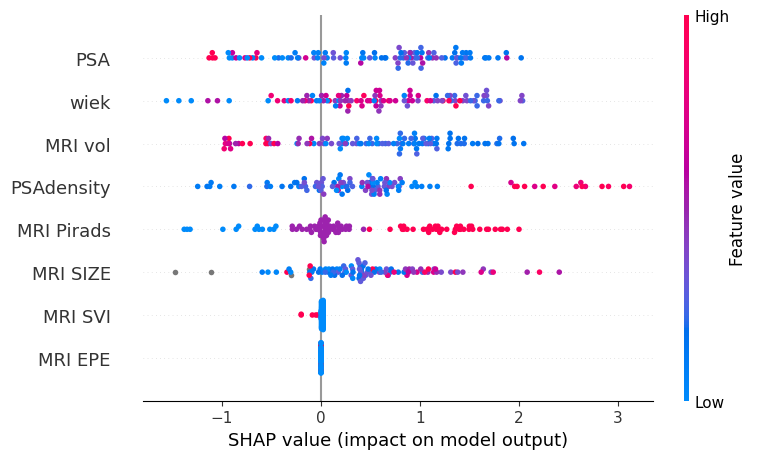

In [45]:
explainer = shap.TreeExplainer(model)
shap_values_df1 = explainer.shap_values(df1)
shap_values_df2 = explainer.shap_values(df2)

# delta_shap = shap_values_df2 - shap_values_df1
shap.summary_plot(shap_values_df2, df2)

In [46]:
explainer = dx.Explainer(model, features, target)
importances = explainer.model_parts()
importances.plot()

Preparation of a new explainer is initiated

  -> data              : 170 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 170 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002B10238AD40> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00302, mean = 0.606, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.201, mean = -0.000217, max = 0.222
  -> model_info        : package xgboost

A new explainer has been created!
